In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms #give access to popular datasets,arch,and image transformations for CV
import  torchvision.datasets as dsets 
from torch.autograd import Variable


# Step1: Load Dataset

In [2]:

train_dataset=dsets.MNIST(root='./data', #saves the data in current working base folder and download data in this data folder
                          train=True,  #this means it is the training dataset
                          transform=transforms.ToTensor(), #remember in pytorch we deal with tensors,so converting dataset to tensor
                          download=True) #must when downloading for first time

In [4]:
len(train_dataset) #this is a list becoz we can do len only on list,there are 60000 different digits

60000

In [5]:
train_dataset[0] #looking thru this dataset,first element in a list

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
type(train_dataset[0]) #its a tuple with first index having image matrix and second as the label of it

tuple

In [10]:
train_dataset[0][0] #accessing 1st(0) element of 0 index tuple in dataset

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
#label
train_dataset[0][1] #accessing 2nd[1] element of 0 index tuple in dataset

5

In [14]:
#input matrix
train_dataset[0][0].size() #getting tensor size of 1st element of 0 index tuple
#its basically our image of size 28*28 with channel=1 since its grayscale image

torch.Size([1, 28, 28])

In [15]:
#lets see the image 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [16]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [20]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

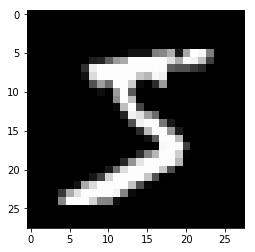

In [19]:
plt.imshow(show_img,cmap='gray')

In [51]:
#label
train_dataset[0][1]

5


# Step1b-Loading MNIST Test dataset


In [22]:
test_dataset=dsets.MNIST(root='./data' ,
                         train=False, #putting train=false inorder to get work on test dataset
                         transform=transforms.ToTensor())

In [23]:
len(test_dataset)

10000

In [25]:
type(test_dataset[0]) #everything is as per the train dataset

tuple

# Step 2-Make Dataset Iterable

In [26]:
#just make the dataset iterable

total data: 60000

minibatch:100

Lets say we will do 5 Epochs (1 Epoch:Running through whole dataset once)

Iterations=(total data/minibatch)* No. of Epochs=3000 (1 iteration:1 mini-batch forward and backward pass)

In [27]:
len(train_dataset)

60000

In [28]:
batch_size=100

In [75]:
epochs=5
n_iters=(len(train_dataset)/batch_size)*epochs

In [31]:
#Create Iterable Object:training dataset

In [32]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True) #sequence changes from epoch to epoch

In [34]:
#Check Iterability
import collections
isinstance(train_loader,collections.Iterable) #if something is not iterable it returns false

True

In [35]:
#Create Iterable Object:training dataset

In [39]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False) #we keep it false here since we will do only one forward pass

In [40]:
#Check Iterability
import collections
isinstance(test_loader,collections.Iterable) #if something is not iterable it returns false

True

# Step 3-Building Model

In [43]:
#same as linear regression since first step in logistic regression is linear regression
class LogisticRegressionModel(nn.Module):
#     input_dim is x and output_dim is y
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear=nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out=self.Linear(x)
        return out

# Step 4-Instantiate Model CLass

In [49]:
train_dataset[0][0].size()
# flatten this one to 784 so that our model can interpret it

torch.Size([1, 28, 28])

In [47]:
input_dim=28*28 
output_dim=10
model=LogisticRegressionModel(input_dim,output_dim)

# Step 5-Instantiate a loss Class

In [54]:
#For Logistic Regression we use Cross Entropy loss

In [57]:
criterion=nn.CrossEntropyLoss() #Cross Entropy automatically computes probability alongwith cross entropy

# Step 6-Instantiate Optimizer Class

In [58]:
learning_rate=.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) 

# Prameter in Depth

In [59]:
#For Linear Regression it was simple 1D parameter

In [65]:
print(model.parameters())
print(len(list(model.parameters()))) # it returns 2 becoz pytorch considers bias automatically along with other parameters

<generator object Module.parameters at 0x000000000AE5F408>
2


In [69]:
# Wx+B
#(10,784)*(784*1)+(10,1)=(10,1)<--This is the output 
#Parameters:W
print(list(model.parameters())[0].size())
#bias parameter:B
print(list(model.parameters())[1].size())

torch.Size([10, 784])
torch.Size([10])


# Step 7-Train Model

In [79]:
iter=0
for epoch in range(int(epochs)):
    for i,(images,labels) in enumerate(train_loader):
        #load images as Variables
        images=Variable(images.view(-1,28*28))
#         print(images.size())
        labels=Variable(labels)
        
        #Clear Gradients wrt parameters
        optimizer.zero_grad()
        
        #forward pass to get output/logits
        outputs=model(images)
        
        #cal loss:Softmax-->cross entropy loss
        loss=criterion(outputs,labels)
        
        #getting gradients wrt parameters
        loss.backward()
        
        #updating parameters
        optimizer.step()
        
        iter+=1
        
        if iter%500==0:
            #calculate Accuracy
            correct=0
            total=0
            #iterate thru dataset
            for images,labels in test_loader:
                images=Variable(images.view(-1,28*28))
                outputs=model(images)
                
                _,predicted=torch.max(outputs.data,1)
                
                total+=labels.size(0)
                
                correct+=(predicted==labels).sum()
            accuracy=100*correct/total
            
            print(epoch)
            print(i)
            print('Iterations {}. Loss {}. Acuracy {}.'.format(iter,loss.data[0],accuracy))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iterations 1. Loss 1.0617908239364624. Acuracy 82.
Iterations 2. Loss 1.0258756875991821. Acuracy 82.
Iterations 3. Loss 1.0450135469436646. Acuracy 82.
Iterations 4. Loss 1.0435837507247925. Acuracy 82.
Iterations 5. Loss 1.0432329177856445. Acuracy 82.
Iterations 6. Loss 1.0664817094802856. Acuracy 82.
Iterations 7. Loss 1.072699785232544. Acuracy 82.
Iterations 8. Loss 1.024956226348877. Acuracy 82.
Iterations 9. Loss 1.1250548362731934. Acuracy 82.
Iterations 10. Loss 1.0495288372039795. Acuracy 82.
Iterations 11. Loss 1.1103675365447998. Acuracy 82.
Iterations 12. Loss 0.9997220039367676. Acuracy 82.
Iterations 13. Loss 0.9689196944236755. Acuracy 82.
Iterations 14. Loss 1.1095552444458008. Acuracy 82.
Iterations 15. Loss 0.9758626818656921. Acuracy 82.
Iterations 16. Loss 1.0584901571273804. Acuracy 82.
Iterations 17. Loss 1.0263999700546265. Acuracy 82.
Iterations 18. Loss 0.9914624094963074. Acuracy 82.
Iterations 19. Loss 1.1492242813110352. Acuracy 82.
Iterations 20. Loss 1.0

Iterations 158. Loss 0.9583495855331421. Acuracy 82.
Iterations 159. Loss 1.0272037982940674. Acuracy 82.
Iterations 160. Loss 1.015979528427124. Acuracy 82.
Iterations 161. Loss 1.0147327184677124. Acuracy 82.
Iterations 162. Loss 1.0187156200408936. Acuracy 82.
Iterations 163. Loss 0.9622434973716736. Acuracy 82.
Iterations 164. Loss 1.014620065689087. Acuracy 82.
Iterations 165. Loss 1.030771255493164. Acuracy 82.
Iterations 166. Loss 0.9945569038391113. Acuracy 82.
Iterations 167. Loss 1.0493732690811157. Acuracy 82.
Iterations 168. Loss 1.0154112577438354. Acuracy 82.
Iterations 169. Loss 1.147772192955017. Acuracy 82.
Iterations 170. Loss 0.9469773173332214. Acuracy 82.
Iterations 171. Loss 0.9960536360740662. Acuracy 82.
Iterations 172. Loss 1.0477938652038574. Acuracy 82.
Iterations 173. Loss 0.9822373986244202. Acuracy 82.
Iterations 174. Loss 1.0643303394317627. Acuracy 82.
Iterations 175. Loss 1.078066349029541. Acuracy 82.
Iterations 176. Loss 1.0431824922561646. Acuracy 82

Iterations 313. Loss 1.0633352994918823. Acuracy 82.
Iterations 314. Loss 0.9766094088554382. Acuracy 82.
Iterations 315. Loss 0.9896830916404724. Acuracy 82.
Iterations 316. Loss 0.9719609618186951. Acuracy 82.
Iterations 317. Loss 0.9734331369400024. Acuracy 82.
Iterations 318. Loss 1.0403648614883423. Acuracy 82.
Iterations 319. Loss 0.9983232021331787. Acuracy 82.
Iterations 320. Loss 1.026971459388733. Acuracy 82.
Iterations 321. Loss 0.9470558762550354. Acuracy 82.
Iterations 322. Loss 0.9319401383399963. Acuracy 82.
Iterations 323. Loss 1.0631147623062134. Acuracy 82.
Iterations 324. Loss 1.023168683052063. Acuracy 82.
Iterations 325. Loss 0.9338685870170593. Acuracy 82.
Iterations 326. Loss 1.0877035856246948. Acuracy 82.
Iterations 327. Loss 1.008986473083496. Acuracy 82.
Iterations 328. Loss 1.000103235244751. Acuracy 82.
Iterations 329. Loss 0.9771014451980591. Acuracy 82.
Iterations 330. Loss 1.0422736406326294. Acuracy 82.
Iterations 331. Loss 0.9875748157501221. Acuracy 8

Iterations 468. Loss 0.9763523936271667. Acuracy 82.
Iterations 469. Loss 1.0479680299758911. Acuracy 82.
Iterations 470. Loss 0.9630277156829834. Acuracy 82.
Iterations 471. Loss 0.9238534569740295. Acuracy 82.
Iterations 472. Loss 0.8446686267852783. Acuracy 82.
Iterations 473. Loss 0.9392833113670349. Acuracy 82.
Iterations 474. Loss 0.9125628471374512. Acuracy 82.
Iterations 475. Loss 1.0271787643432617. Acuracy 82.
Iterations 476. Loss 0.9062348008155823. Acuracy 82.
Iterations 477. Loss 1.0157973766326904. Acuracy 82.
Iterations 478. Loss 0.9155383110046387. Acuracy 82.
Iterations 479. Loss 1.0592103004455566. Acuracy 82.
Iterations 480. Loss 0.9640820026397705. Acuracy 82.
Iterations 481. Loss 1.025484323501587. Acuracy 82.
Iterations 482. Loss 1.0131216049194336. Acuracy 82.
Iterations 483. Loss 1.0514096021652222. Acuracy 82.
Iterations 484. Loss 0.9248471856117249. Acuracy 82.
Iterations 485. Loss 0.9691184759140015. Acuracy 82.
Iterations 486. Loss 1.0044416189193726. Acurac